In [12]:
# Load our libraires
import pandas
import numpy
import matplotlib.pyplot as pyplot

In [6]:
# Load our sample data
input_file_path = "../Example Data Sets/Test Scores.csv"
delimiter = ","
df = pandas.read_csv(input_file_path, delimiter=delimiter)
df

,ACT,FinalExam,QuizAvg,TestAvg
0,33,181,95,89
1,31,169,81,89
2,21,176,65,68
3,25,181,66,90
4,29,169,89,81
5,24,103,61,57
6,25,150,81,76
7,29,147,86,76
8,36,181,98,102
9,26,163,72,70


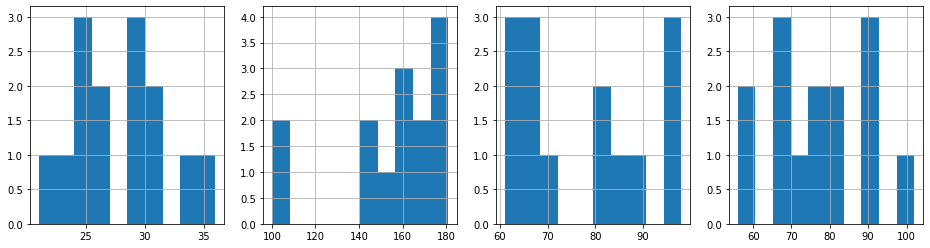

In [20]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)
df["ACT"].hist(ax=ax[0]);
df["FinalExam"].hist(ax=ax[1]);
df["QuizAvg"].hist(ax=ax[2]);
df["TestAvg"].hist(ax=ax[3]);

# Normalization Techniques

- **Standardization** - Transforming distributions to have standard normal parameters $(\mu=0, \sigma=1)$
- **Min-Max Scaling** - Transformind distributions to have the same range $(max = 1, min = 0)$
- **Quantile Normalization** - Transforming distributions to have the similar or equivalent statistical properties $( \mu, \sigma, min, max, quantiles)$

# Standardized

In [63]:
# Compute the z-scores

zscore_df = df.copy()
zscore_df["ACT"] = ( df["ACT"] - df["ACT"].mean() ) / df["ACT"].std()
zscore_df["FinalExam"] = ( df["FinalExam"] - df["FinalExam"].mean() ) / df["FinalExam"].std()
zscore_df["QuizAvg"] = ( df["QuizAvg"] - df["QuizAvg"].mean() ) / df["QuizAvg"].std()
zscore_df["TestAvg"] = ( df["TestAvg"] - df["TestAvg"].mean() ) / df["TestAvg"].std()
zscore_df

,ACT,FinalExam,QuizAvg,TestAvg
0,1.270931,0.940813,1.304131,0.952737
1,0.790038,0.481346,0.285766,0.952737
2,-1.614426,0.749368,-0.878080,-0.638767
3,-0.652640,0.940813,-0.805340,1.028523
4,0.309145,0.481346,0.867689,0.346450
5,-0.893087,-2.045721,-1.169041,-1.472411
6,-0.652640,-0.246143,0.285766,-0.032480
7,0.309145,-0.361010,0.649467,-0.032480
8,1.992270,0.940813,1.522352,1.937953
9,-0.412194,0.251613,-0.368898,-0.487195


In [64]:
print("{0} {1} {2}".format("Column".ljust(10), "Mean".ljust(10), "Std".ljust(10)))
for column_name in zscore_df.columns:
    column = zscore_df[column_name]
    mean = column.mean()
    std = column.std()
    
    print("{0} {1} {2}".format(column_name.ljust(10), str(round(mean)).ljust(10), str(round(std))).ljust(10))

Column     Mean       Std       
ACT        0          1
FinalExam  0          1
QuizAvg    0          1
TestAvg    0          1


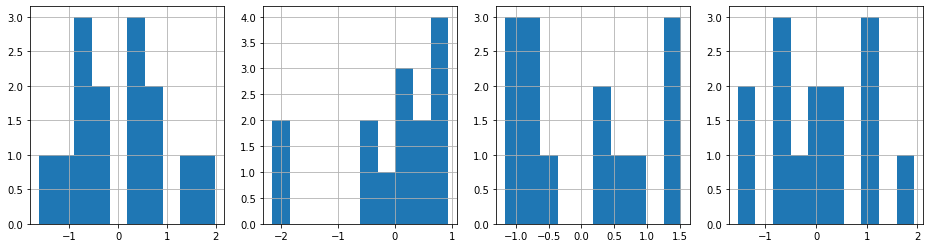

In [22]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)
zscore_df["ACT"].hist(ax=ax[0]);
zscore_df["FinalExam"].hist(ax=ax[1]);
zscore_df["QuizAvg"].hist(ax=ax[2]);
zscore_df["TestAvg"].hist(ax=ax[3]);

In [237]:
zscore_df.describe()

,ACT,FinalExam,QuizAvg,TestAvg
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
mean,-2.537653e-16,4.440892e-16,1.903239e-16,-2.061843e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.614426e+00,-2.160588e+00,-1.169041e+00,-1.548197e+00
25%,-6.526403e-01,-3.322929e-01,-8.780800e-01,-6.387667e-01
50%,-5.152423e-02,2.516127e-01,-4.156592e-02,-3.247966e-02
75%,6.698151e-01,6.823628e-01,8.131332e-01,8.011650e-01
max,1.992270e+00,9.408128e-01,1.522352e+00,1.937953e+00


# Min-Max Scaling

In [65]:
minmax_df = df.copy()
minmax_df["ACT"] = (df["ACT"] - df["ACT"].min()) / (df["ACT"].max() - df["ACT"].min())
minmax_df["FinalExam"] = (df["FinalExam"] - df["FinalExam"].min()) / (df["FinalExam"].max() - df["FinalExam"].min())
minmax_df["QuizAvg"] = (df["QuizAvg"] - df["QuizAvg"].min()) / (df["QuizAvg"].max() - df["QuizAvg"].min())
minmax_df["TestAvg"] = (df["TestAvg"] - df["TestAvg"].min()) / (df["TestAvg"].max() - df["TestAvg"].min())
minmax_df

,ACT,FinalExam,QuizAvg,TestAvg
0,0.800000,1.000000,0.918919,0.717391
1,0.666667,0.851852,0.540541,0.717391
2,0.000000,0.938272,0.108108,0.260870
3,0.266667,1.000000,0.135135,0.739130
4,0.533333,0.851852,0.756757,0.543478
5,0.200000,0.037037,0.000000,0.021739
6,0.266667,0.617284,0.540541,0.434783
7,0.533333,0.580247,0.675676,0.434783
8,1.000000,1.000000,1.000000,1.000000
9,0.333333,0.777778,0.297297,0.304348


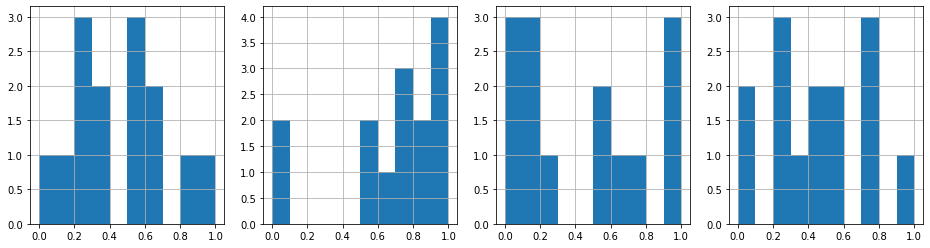

In [66]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)
minmax_df["ACT"].hist(ax=ax[0]);
minmax_df["FinalExam"].hist(ax=ax[1]);
minmax_df["QuizAvg"].hist(ax=ax[2]);
minmax_df["TestAvg"].hist(ax=ax[3]);

In [236]:
minmax_df.describe()

,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000
mean,0.447619,0.696649,0.434363,0.444099
std,0.277262,0.322435,0.371555,0.286849
min,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.589506,0.108108,0.260870
50%,0.433333,0.777778,0.418919,0.434783
75%,0.633333,0.916667,0.736486,0.673913
max,1.000000,1.000000,1.000000,1.000000


# Quantile Normalization

In [67]:
from collections import OrderedDict

In [233]:
from collections import OrderedDict
def normalize_quantiles(df):
    
    # Compute the row means
    d = {}
    for column_name in df.columns:
        d.update({column_name : df[column_name].sort_values().array})
    sorted_df = pandas.DataFrame(d)   
    sorted_df_row_means = sorted_df.mean(axis = 1).tolist()
        
    # For each column, compute the rank, and replace it with the corresponding row mean
    tmp = df.copy().astype(float)
    for column_name in df.columns:
        # Compute the rank for each element
        column_element_ranks = numpy.searchsorted(df[column_name].sort_values().array, df[column_name])    
        # Replace the elemenet rank with the coresponding row mean
        column = df[column_name]
        for i in range(0, len(column)):
            element = column[i]
            element_rank = column_element_ranks[i]
            num_of_elements_with_same_rank = len([e for e in column if e == element])
            row_means_to_average = sorted_df_row_means[element_rank:element_rank+num_of_elements_with_same_rank]
            mean_row_mean = numpy.mean(row_means_to_average)
            tmp[column_name][i] = mean_row_mean
    tmp.index = df.index
    return tmp     

qnorm_df = normalize_quantiles(df)
qnorm_df

,ACT,FinalExam,QuizAvg,TestAvg
0,99.750,101.000,99.375,97.625
1,97.625,90.625,88.625,97.625
2,59.500,96.250,76.625,76.625
3,76.625,101.000,80.500,99.750
4,89.500,90.625,96.250,90.625
5,75.250,61.250,59.500,61.250
6,76.625,77.000,88.625,85.750
7,89.500,75.750,91.250,85.750
8,104.250,101.000,104.250,104.250
9,82.375,85.750,84.250,80.500


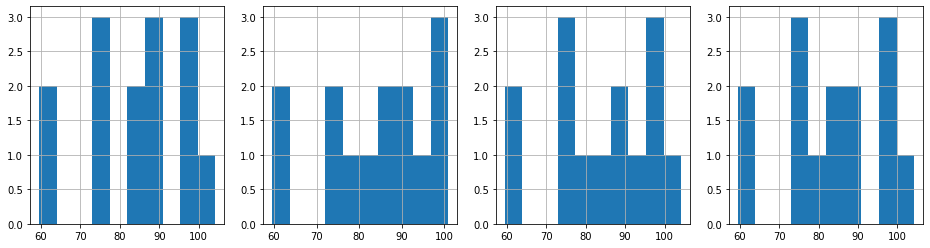

In [234]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)
qnorm_df["ACT"].hist(ax=ax[0]);
qnorm_df["FinalExam"].hist(ax=ax[1]);
qnorm_df["QuizAvg"].hist(ax=ax[2]);
qnorm_df["TestAvg"].hist(ax=ax[3]);

In [235]:
qnorm_df.describe()

,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000
mean,84.410714,84.410714,84.410714,84.410714
std,13.661378,13.654514,13.703894,13.689853
min,59.500000,59.500000,59.500000,59.500000
25%,76.625000,76.062500,76.625000,76.625000
50%,85.937500,85.750000,86.437500,85.750000
75%,95.593750,94.843750,95.000000,95.875000
max,104.250000,101.000000,104.250000,104.250000
